# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_noing_250_512_025dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_noing_250_512_025dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(250 -> 512)
  (3): nn.Dropout(0.250000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 1.0021528246432)
('Valid Perplexity: ', 12048.259665999)
('Test Perplexity: ', 17760.961687153)


### Loss vs. Epoch

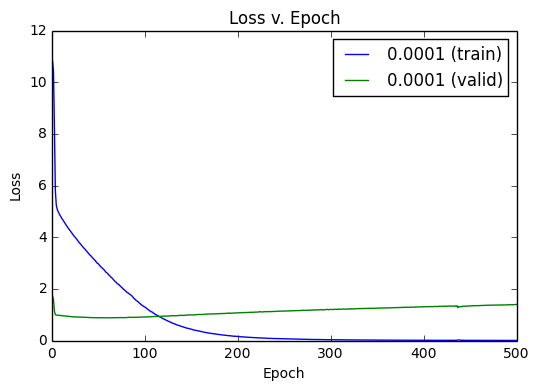

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

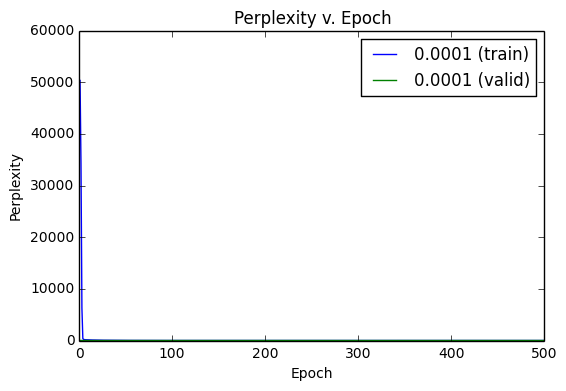

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  chana masala

Gend:  <beg> in large saucepan prepare macaroni according to package directions . drain . <step> in same pan mix remaining ingredients . over medium heat , heat , heat

True:  in large saucepan prepare macaroni according to package directions . drain . <step> in same pan mix remaining ingredients . over medium heat , heat



Input:  corn dog muffins

Gend:  <beg> in a large saucepan cook green beans and asparagus in lightly salted boiling water for 2 tablespoons flour ; cook . <step> in a large skillet over

True:  in a large saucepan cook green beans and asparagus in lightly salted boiling water for 2 <end>



Input:  lemon delight mini cheesecake

Gend:  <beg> <end> <end> in a large skillet over medium - high heat . add chicken to pan ; sauté . <step> mix together the garlic , coriander ,

True:  <end> <end>



Input:  sardine dip

Gend:  <beg> soak the shrimp in cold water for about 30 minutes , then drain . <step> in a small saucepan over medium heat , heat , 

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> place ground coffee in coffee filter and add cold water to coffee maker and brew to make . then pour in pork and beans and stir it

True:  toast nuts and seeds in a cast - iron frying pan on medium heat or in the oven <end>



Input:  make <mask> <UNK2> <mask> pulled <mask> <UNK2> <mask> <UNK2> <mask>

Gend:  <beg> place ground coffee in coffee filter and add cold water to coffee maker and brew to make . then pour in pork and beans and stir it

True:  <end> <end>



Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> place ground coffee in coffee filter and add cold water to coffee maker and brew to make . then pour in pork and beans and stir it

True:  1 to make the miso sauce : nest a bowl on top of simmering water , or use a <end>



Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> place ground coffee in coffee

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  michelle 's baked ham

Gend:  <beg> to prepare the garlic sauce , heat the vegetable oil , garlic , and parsley over medium heat until warmed through . set aside to a large

True:  throw all the ingredients but the last ( tapioca flour + water ) in a blender . i use my trusty magic bullet . <end>



Input:  deviled eggs

Gend:  <beg> in a large skillet , saute onion and garlic in olive oil on medium heat , until onion softens . <step> add the milk and cook over

True:  preheat your oven at 350 . <step> lightly coat your pan with oil & flour . <step> mix cake <end>



Input:  world 's best ribs

Gend:  <beg> cook noodles in 4 quarts of boiling water in a large pot for 10 minutes until tender . drain . <step> meanwhile meanwhile the noodles drain it

True:  in a small bowl , combine the peanut butter , lime juice , honey , sesame oil , garlic and chili paste <end>



Input:  pacific rim glazed flank steak

Gend:  <beg> in a bowl , combine flour , sugar , cocoa , baking powder , s

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  21.08 

1-gram Score:  27.6
2-gram Score:  20.2
3-gram Score:  19
4-gram Score:  18.7


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [10]:
npairs_generated = report['n_pairs_bleu_generated']
npairs_gold = report['n_pairs_bleu_gold']
print 'Overall Score (Generated): ', npairs_generated['score'], '\n'
print '1-gram Score: ', npairs_generated['components']['1']
print '2-gram Score: ', npairs_generated['components']['2']
print '3-gram Score: ', npairs_generated['components']['3']
print '4-gram Score: ', npairs_generated['components']['4']

print '\n'

print 'Overall Score: (Gold)', npairs_gold['score'], '\n'
print '1-gram Score: ', npairs_gold['components']['1']
print '2-gram Score: ', npairs_gold['components']['2']
print '3-gram Score: ', npairs_gold['components']['3']
print '4-gram Score: ', npairs_gold['components']['4']

Overall Score (Generated):  22.22 

1-gram Score:  38.9
2-gram Score:  20.8
3-gram Score:  17.8
4-gram Score:  16.9


Overall Score: (Gold) 12.78 

1-gram Score:  25.6
2-gram Score:  13.8
3-gram Score:  9.9
4-gram Score:  7.7


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [11]:
print 'Average Generated Score: ', report['average_alignment_generated']
print 'Average Gold Score: ', report['average_alignment_gold']

Average Generated Score:  29.1111111111
Average Gold Score:  26.7973856209
